In [2]:
# Required installation and imports

import pandas as pd
import pymongo
from pymongo import MongoClient 
import pprint as pp
import warnings
import requests
from urllib.request import urlopen  
import io
import csv


In [3]:
# Import structured dataset - CSV file from API

apiURL_1 = "https://data.sfgov.org/api/views/rkru-6vcg/rows.csv?accessType=DOWNLOAD" # API Link to download CSV file
apiURL_2 = "https://data.sfgov.org/api/views/u397-j8nr/rows.csv?accessType=DOWNLOAD"
def getData(URL):                                # Creating function to fetch data from API
    r = requests.get(url=URL)
    if r.status_code == 200:                     # Handeling API response                       
        file_obj = io.BytesIO(r.content)
        data = pd.read_csv(file_obj)               # Reading CSV file 
        return data
    else:
        print(f"Error retrieving data: {r.status_code}")  
        return 



In [4]:
passenger_data = getData(apiURL_1)
cargo_data = getData(apiURL_2)

In [5]:
passenger_data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
50725,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Other,International,A,3197
50726,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,5836
50727,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,6650
50728,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,1679


In [6]:
cargo_data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.603873
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.475778
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,55427,25.141687
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,50278,22.806101
4,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649409
...,...,...,...,...,...,...,...,...,...,...,...,...
75311,202212,United Airlines,UA,United Airlines,UA,International,Middle East,Enplaned,Mail,Passenger,28832,13.078195
75312,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Deplaned,Cargo,Passenger,275516,124.974058
75313,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Cargo,Passenger,116854,53.004974
75314,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Cargo,Passenger,757383,343.548929


In [7]:
df1 = passenger_data.drop_duplicates(subset=["Activity Period", "Operating Airline",'Operating Airline IATA Code','Published Airline','Published Airline IATA Code',"GEO Summary","GEO Region","Activity Type Code"], keep=False)
df1.loc[df1["Operating Airline IATA Code"].isna() | (df1["Operating Airline IATA Code"] == "(INACTIVE - DO NOT USE)"), "Operating Airline IATA Code"] = "default"
# Load the second dataset and drop duplicates if all six common columns are the same
df2 = cargo_data.drop_duplicates(subset=["Activity Period", "Operating Airline",'Operating Airline IATA Code','Published Airline','Published Airline IATA Code',"GEO Summary","GEO Region","Activity Type Code"], keep=False)
df2.loc[df1["Operating Airline IATA Code"].isna() | (df2["Operating Airline IATA Code"] == "(INACTIVE - DO NOT USE)"), "Operating Airline IATA Code"] = "default"

merged_df = pd.merge(df1, df2, on=["Activity Period", "Operating Airline",'Operating Airline IATA Code','Published Airline','Published Airline IATA Code',"GEO Summary","GEO Region","Activity Type Code"], how="inner")

In [8]:
data=merged_df

In [9]:
df1


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
23571,202107,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",default,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",NaN,International,Asia,Deplaned,Other,International,A,2534
23572,202107,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",default,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",NaN,International,Asia,Enplaned,Other,International,A,3372
23682,202108,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",default,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",NaN,International,Asia,Deplaned,Other,International,A,3072
23683,202108,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",default,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",NaN,International,Asia,Enplaned,Other,International,A,3681
23794,202109,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",default,"Philippine Airline, Inc. (INACTIVE - DO NOT USE)",NaN,International,Asia,Deplaned,Other,International,A,2639
...,...,...,...,...,...,...,...,...,...,...,...,...
50725,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Other,International,A,3197
50726,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,5836
50727,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,6650
50728,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,1679


In [11]:
df2

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
30215,201903,Norwegian Air UK Ltd,DI,Norwegian Air UK Ltd,DI,International,Europe,Deplaned,Cargo,Passenger,16127,7.315207
30300,201904,Air Italy S.P.A,IG,Air Italy S.P.A,IG,International,Europe,Deplaned,Cargo,Passenger,53899,24.448586
30301,201904,Air Italy S.P.A,IG,Air Italy S.P.A,IG,International,Europe,Enplaned,Cargo,Passenger,6947,3.151159
30407,201904,Norwegian Air UK Ltd,DI,Norwegian Air UK Ltd,DI,International,Europe,Deplaned,Cargo,Passenger,115274,52.288286
30502,201905,Air Italy S.P.A,IG,Air Italy S.P.A,IG,International,Europe,Deplaned,Cargo,Passenger,176780,80.187408
...,...,...,...,...,...,...,...,...,...,...,...,...
75273,202212,Turkish Airlines,TK,Turkish Airlines,TK,International,Europe,Enplaned,Cargo,Passenger,280957,127.442095
75312,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Deplaned,Cargo,Passenger,275516,124.974058
75313,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Cargo,Passenger,116854,53.004974
75314,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Cargo,Passenger,757383,343.548929


In [10]:
data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
0,202107,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Other,International,A,2534,Cargo,Passenger,590106,267.672082
1,202107,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Enplaned,Other,International,A,3372,Cargo,Passenger,134528,61.021901
2,202108,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Other,International,A,3072,Cargo,Passenger,721679,327.353594
3,202108,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Enplaned,Other,International,A,3681,Cargo,Passenger,90772,41.174179
4,202109,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Other,International,A,2639,Cargo,Passenger,627557,284.659855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,202212,Turkish Airlines,TK,Turkish Airlines,TK,International,Europe,Enplaned,Other,International,G,12248,Cargo,Passenger,280957,127.442095
341,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Deplaned,Other,International,A,2363,Cargo,Passenger,275516,124.974058
342,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Other,International,A,3197,Cargo,Passenger,116854,53.004974
343,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,5836,Cargo,Passenger,757383,343.548929


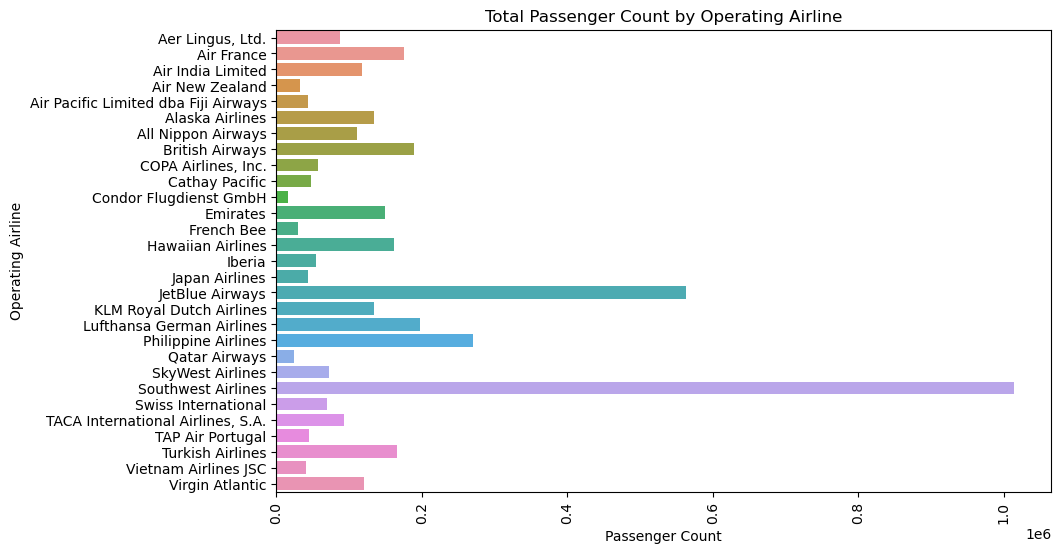

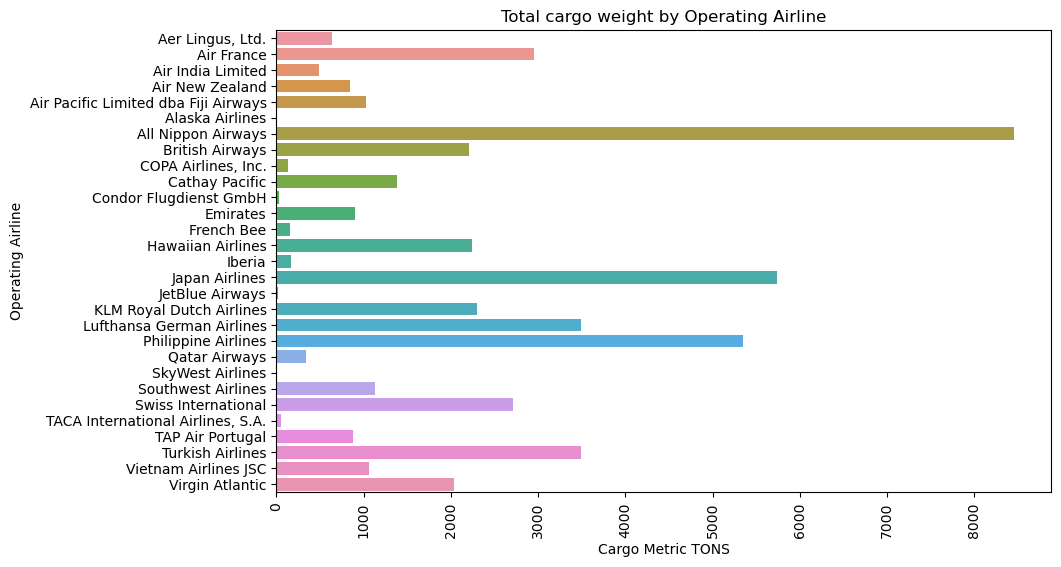

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data for passenger details
airline_passengers = data.groupby('Operating Airline')['Passenger Count'].sum().reset_index()

# Creating bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Passenger Count', y='Operating Airline', data=airline_passengers)
plt.xticks(rotation=90)
plt.ylabel('Operating Airline')
plt.xlabel('Passenger Count')
plt.title('Total Passenger Count by Operating Airline')
plt.show()


# Grouping the data for cargo details
airline_cargos = data.groupby('Operating Airline')['Cargo Metric TONS'].sum().reset_index()

# Creating bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Cargo Metric TONS', y='Operating Airline', data=airline_cargos)
plt.xticks(rotation=90)
plt.ylabel('Operating Airline')
plt.xlabel('Cargo Metric TONS')
plt.title('Total cargo weight by Operating Airline')
plt.show()

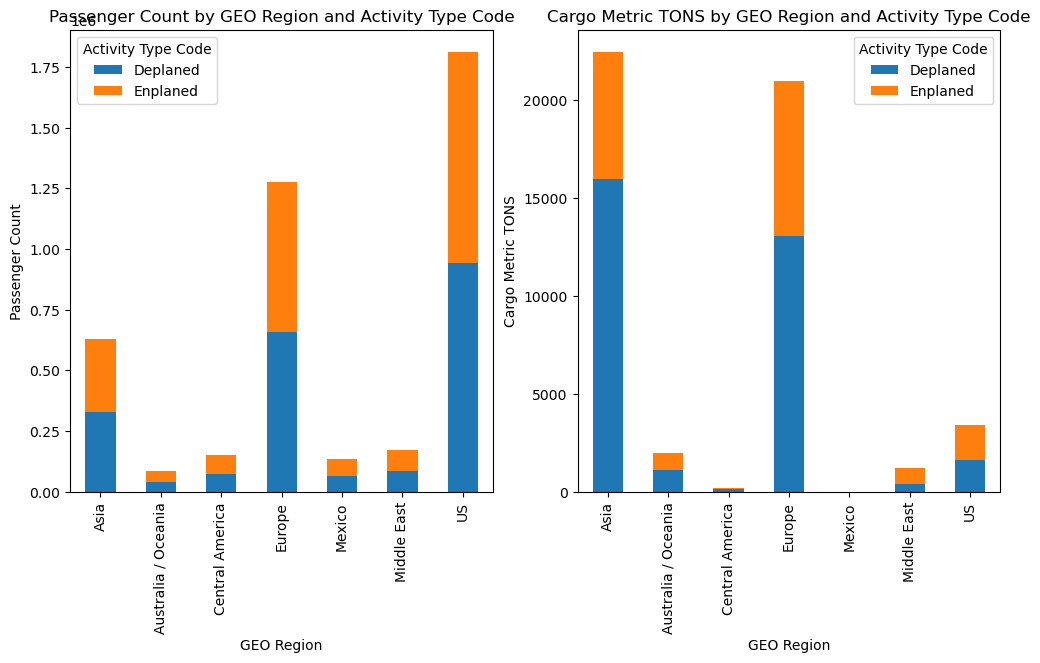

In [18]:
#grouping the data
region_passengers = data.groupby(['GEO Region', 'Activity Type Code'])['Passenger Count'].sum().unstack().reset_index()
region_cargo = data.groupby(['GEO Region', 'Activity Type Code'])['Cargo Metric TONS'].sum().unstack().reset_index()
# Set the figure size
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Create the stacked bar chart for Passenger Count using Matplotlib
region_passengers.plot(x='GEO Region', kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('GEO Region')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('Passenger Count by GEO Region and Activity Type Code')

# Create the stacked bar chart for Cargo Metric TONS using Matplotlib
region_cargo.plot(x='GEO Region', kind='bar', stacked=True, ax=axs[1])
axs[1].set_xlabel('GEO Region')
axs[1].set_ylabel('Cargo Metric TONS')
axs[1].set_title('Cargo Metric TONS by GEO Region and Activity Type Code')

# Show the charts
plt.show()


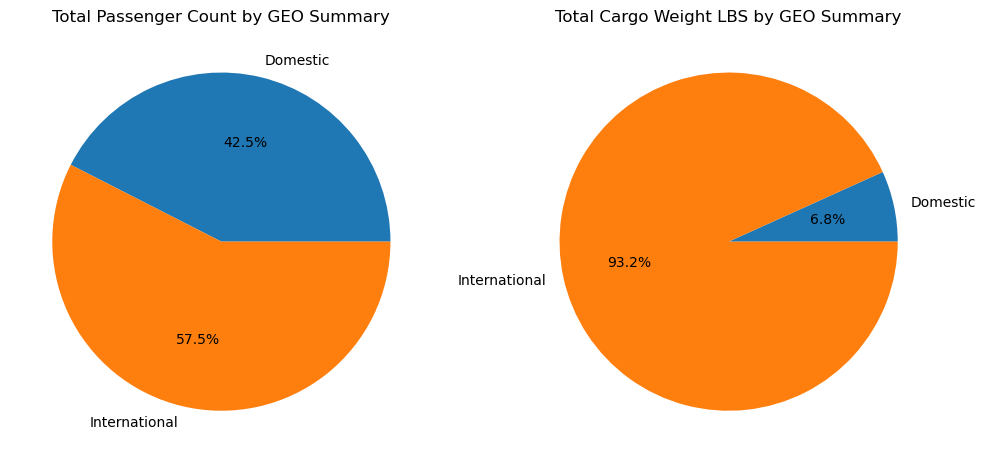

In [16]:
# Grouping the datas
grouped_data1 = data.groupby('GEO Summary')['Passenger Count'].sum().reset_index()

grouped_data2 = data.groupby('GEO Summary')['Cargo Weight LBS'].sum().reset_index()

# setting the figure size
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Creating the pie chart for Passenger data
axs[0].pie(grouped_data1['Passenger Count'], labels=grouped_data1['GEO Summary'], autopct='%1.1f%%')
axs[0].set_title('Total Passenger Count by GEO Summary')

# Creating the pie chart for Cargo data
axs[1].pie(grouped_data2['Cargo Weight LBS'], labels=grouped_data2['GEO Summary'], autopct='%1.1f%%')
axs[1].set_title('Total Cargo Weight LBS by GEO Summary')


plt.show()
